# Extrapolate year

Use a kNN with k = 1 (equivalent to a Delaunay triangulation) to extrapolate the date from building to all points.

In [30]:
import numpy as np
import sklearn
import sklearn.neighbors
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
x_obs, y_obs = np.meshgrid(np.arange(100), np.arange(100))
year_obs = np.random.randint(1600, 2000, size=(100, 100)).ravel()

D_obs = np.concatenate((x_obs.reshape((-1, 1)), y_obs.reshape((-1, 1))), axis=1)

# Let's say we're missing 20% data.
good_idx = sorted(np.random.permutation(len(year_obs))[:8000])
year_obs, D_obs = year_obs[good_idx], D_obs[good_idx, :]

# Higher res grid
x_pred, y_pred = np.meshgrid(np.arange(500) / 5, np.arange(500) / 5)
D_pred = np.concatenate((x_pred.reshape((-1, 1)), y_pred.reshape((-1, 1))), axis=1)

assert D_pred.shape[1] == D_obs.shape[1]
assert D_obs.shape[0] == len(year_obs)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
model.fit(D_obs, year_obs)
year_pred = model.predict(D_pred)

Text(0.5, 1.0, 'Extrapolated data')

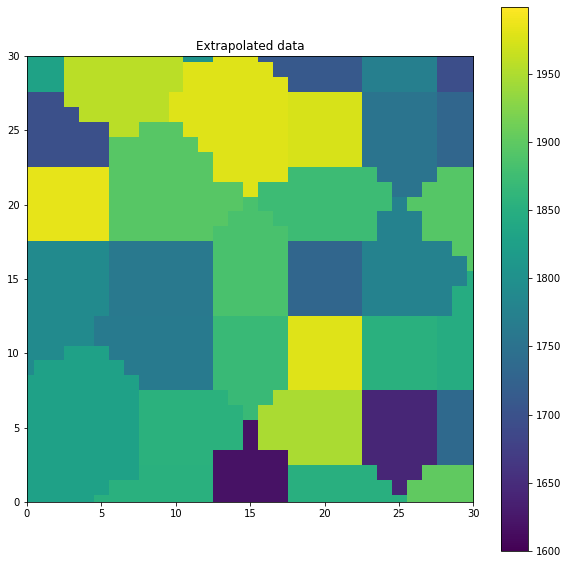

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(year_pred.reshape((500, 500)))
plt.colorbar()
plt.xlim((0, 30))
plt.ylim((0, 30))
plt.title('Extrapolated data')